In [142]:
datafile = 'avocado.csv'
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as DT
from scipy import stats
dataArray = np.recfromcsv(datafile, encoding=None)

In [90]:
print(dataArray)

[( 0, '2015-12-27', 1.33,  64236.62, 1036.74,  54454.85,  48.16,  8696.87,  8603.62,  93.25, 0., 'conventional', 2015, 'Albany')
 ( 1, '2015-12-20', 1.35,  54876.98,  674.28,  44638.81,  58.33,  9505.56,  9408.07,  97.49, 0., 'conventional', 2015, 'Albany')
 ( 2, '2015-12-13', 0.93, 118220.22,  794.7 , 109149.67, 130.5 ,  8145.35,  8042.21, 103.14, 0., 'conventional', 2015, 'Albany')
 ...
 ( 9, '2018-01-21', 1.87,  13766.76, 1191.92,   2452.79, 727.94,  9394.11,  9351.8 ,  42.31, 0., 'organic', 2018, 'WestTexNewMexico')
 (10, '2018-01-14', 1.93,  16205.22, 1527.63,   2981.04, 727.01, 10969.54, 10919.54,  50.  , 0., 'organic', 2018, 'WestTexNewMexico')
 (11, '2018-01-07', 1.62,  17489.58, 2894.77,   2356.13, 224.53, 12014.15, 11988.14,  26.01, 0., 'organic', 2018, 'WestTexNewMexico')]


In [97]:
totalVolume = []
for i in dataArray:
    totalVolume.append(float(i[3]))
    
averagePrice = []
for i in dataArray:
    averagePrice.append(float(i[2]))
    
dates = []
for i in dataArray:
    dates.append(i[1])

In [98]:
print("Total Volume")
print(totalVolume)
print("\n")
print("Average Price")
print(averagePrice)
print("\n")
print("Dates")
print(dates)


Total Volume
[64236.62, 54876.98, 118220.22, 78992.15, 51039.6, 55979.78, 83453.76, 109428.33, 99811.42, 74338.76, 84843.44, 64489.17, 61007.1, 106803.39, 69759.01, 76111.27, 99172.96, 105693.84, 79992.09, 80043.78, 111140.93, 75133.1, 106757.1, 96617.0, 124055.31, 109252.12, 89534.81, 104849.39, 89631.3, 122743.06, 95123.62, 101470.91, 109857.47, 120427.91, 59197.67, 49585.46, 49064.73, 48364.29, 47362.13, 67799.08, 46346.85, 43045.79, 40507.36, 55595.74, 45675.05, 41567.62, 51253.97, 70873.6, 45147.5, 44511.28, 41195.08, 40873.28, 386100.49, 331377.53, 417772.47, 357636.82, 333280.79, 356414.57, 339860.68, 334041.6, 419088.74, 358478.08, 349072.48, 433874.46, 418682.26, 370321.17, 516432.6, 417232.18, 472136.53, 382972.72, 379054.29, 465213.81, 503791.72, 405898.44, 437377.75, 557212.99, 407204.88, 562462.33, 435210.71, 554763.76, 465804.78, 551009.05, 454702.0, 623212.04, 451250.7, 480071.18, 634213.1, 448596.76, 430966.34, 451101.89, 383139.49, 365722.14, 479590.62, 399566.22, 4208

# Statistiek
## Centrummaten
### Data prepareren

In [99]:
totalVolumenp = np.array(totalVolume)
averagePricenp = np.array(averagePrice)
datesnp = np.array(dates)

### Gemiddelden berekenen

In [76]:
print("De gemiddelde totale volume is {}".format(round(totalVolumenp.mean(),2)))
print("De overall gemiddelde prijs is {} $".format(round(averagePricenp.mean(),2)))

De gemiddelde totale volume is 850644.01
De overall gemiddelde prijs is 1.41 $


### Medianen berekenen

In [81]:
print("De mediaan van het totale volume is {}".format(np.median(totalVolumenp)))
print("De mediaan van alle gemiddelde prijzen is {} $".format(np.median(averagePricenp)))

De mediaan van het totale volume is 107376.76
De mediaan van alle gemiddelden is 1.37 $


### Modus berekenen

In [83]:
print("De modus van het totale volume is {}".format(stats.mode(totalVolumenp)))
print("De modus van alle gemiddelde prijzen is {}".format(stats.mode(averagePricenp)))

De modus van het totale volume is ModeResult(mode=array([2038.99]), count=array([2]))
De modus van alle gemiddelden is ModeResult(mode=array([1.15]), count=array([202]))


## Spreidingsmaten

### Bereik berekenen

In [85]:
print("Het bereik van de totale volumes is {}".format(totalVolumenp.max() - totalVolumenp.min()))
print("Het bereik van alle gemiddelde prijzen is {} $".format(averagePricenp.max() - averagePricenp.min()))

Het bereik van de totale volumes is 62505561.96
Het bereik van alle gemiddelde prijzen is 2.81 $


### Interkwartiel afstanden berekenen (d.m.v. Boxplot)
#### Boxplot voor totale volumes ( zeer raar boxplot )

{'whiskers': [<matplotlib.lines.Line2D at 0x1ff488038d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ff48522898>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ff48801f60>],
 'medians': [<matplotlib.lines.Line2D at 0x1ff48322b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ff48322a58>],
 'means': []}

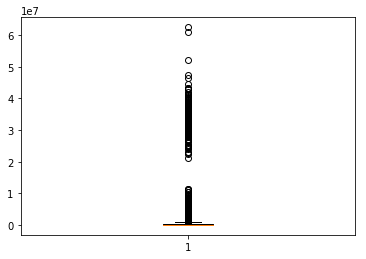

In [86]:
plt.boxplot(totalVolumenp)

#### Boxplot voor gemiddelde prijzen

{'whiskers': [<matplotlib.lines.Line2D at 0x1ff4a19d7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ff4a19deb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ff4a19d128>],
 'medians': [<matplotlib.lines.Line2D at 0x1ff4a1a3ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ff4a1a3ef0>],
 'means': []}

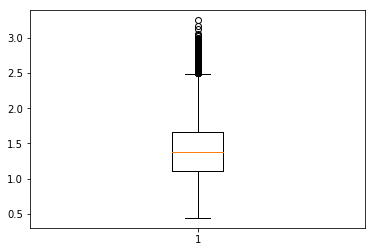

In [88]:
plt.boxplot(averagePricenp)

#### Lijngrafiek voor gemiddelde prijzen (Laatste 100 anders is dataset onduidelijk)

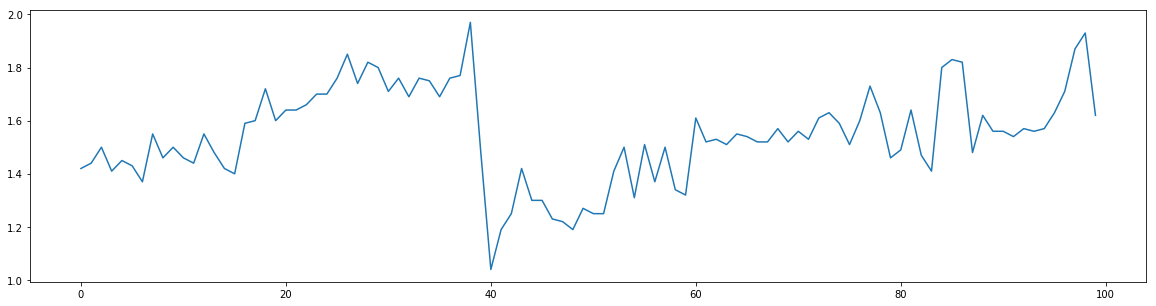

In [150]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
ax.plot(averagePricenp[-100:])

#### Lijngrafiek voor totale volumes (Laatste 35)

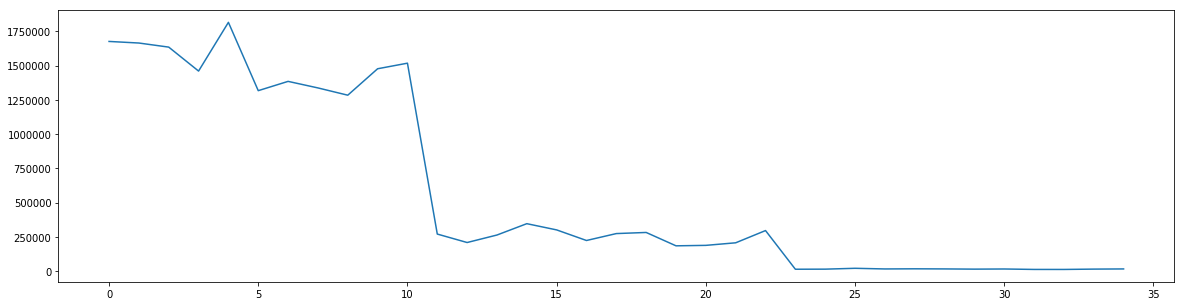

In [159]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
ax.plot(totalVolumenp[-35:])